# Project: Compute the Profit and Breakeven for European Options Contracts
This project will familiarize students with computing the profit and breakeven points of European-style `call` and `put` contracts

### Learning objectives
* __Objective 1__: Computing the Payoff, Profit, and Breakeven for a European `call` contract
    * `TODO`: Compute the Payoff array for a `call` contract as a function of $S(T)$
    * `TODO`: Compute the Profit array for a `call` contract as a function of $S(T)$
    * `Check`: Numerical versus analytical breakeven calculation for a `call` contract
* __Objective 2__: Compute the Payoff, Profit, and Breakeven for a European `put` contract

## Setup
We set up the computational environment by including the `Include.jl` file. The `Include.jl` file loads external packages, various functions we will use in the exercise, and custom types to model the components of our example problem.
* See the [Julia programming language documentation](https://docs.julialang.org/en/v1/) and the [VLQuantitativeFinancePackage.jl documentation](https://github.com/varnerlab/VLQuantitativeFinancePackage.jl) for additional information on functions and types used in this material. 

In [1]:
include("Include.jl");

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-133/module-1/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-133/module-1/Manifest.toml`
  Activating project at `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-133/module-1`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-133/module-1/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-133/module-1/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-133/module-1/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CH

In [2]:
β = range(0.6,stop=1.4,length=1001) |> collect;

## Objective 1: Computing the Payoff, Profit and Breakeven for a European `call` contract
We have a European `call` that expires in `T = 365` days with a strike price of `K = 60.0 USD`. The current share price is `S(0) = 60.0 USD`. Assume a risk-free rate of return of `5%` and an implied volatility of `10%`. The correct premium is $\mathcal{P}_{c}(K,S(0))$ = `4.08 USD/share`. 

Compute the breakeven and the profit as a function of the share price at expiration $S(T)$ for this contract from the perspective of the contract buyer.

### TODO: Compute the Payoff array for a `call` contract
The profit for a `call` contract is the contract's payoff minus the premium paid for the contract. On the other hand, the breakeven is the share price at expiration where the `profit = 0`.
* Create a `MyEuropeanCallContractModel` contract model instance with the abovementioned contract parameters. Store this model in the `call_contract_model` variable:

In [3]:
call_contract_model = build(MyEuropeanCallContractModel, (
        K = 60.0, IV = 0.10, DTE = 1.0, sense = 1, copy = 1));

Next, create an array holding possible share prices at expiration by perturbing the initial share price by the $\beta$ variable. Store these values in the `share_price_array` variable.

In [4]:
share_price_array = Array{Float64,1}();
Sₒ = 60.0; # USD/share initial share price 
for i ∈ eachindex(β)
    βᵢ = β[i]; # get perturbation value
    push!(share_price_array, βᵢ*Sₒ); # compute the perturbed price, and store 
end

Compute the payoff and profit arrays using the `share_price_array` and the `payoff(...)` function. Save the payoff array in the `V_call` variable.
* The `payoff(...)` function takes a contract array $\mathcal{C}$, and the share prices $S(T)$ as a $\dim S(T)\times{1}$ vector, and returns a $\dim S(T)\times{3}$ array in the case of single contract. The first column is the share price, and the second column is the contract's payoff.
* In cases with multiple contracts, the last column is the net payoff across all contracts. In this case, because $\dim\mathcal{C} = 1$, columns two and three are equal.

In [5]:
 V_call = payoff([call_contract_model], share_price_array);

### TODO: Compute the Profit array for a `call` contract

Finally, given the payoff array for the `call` contract stored in the `V_call` variable, we can compute the profit and breakeven point by subtracting the premium $\mathcal{P}_{c}$ paid for the contract. Store this value in the `profit_array_call` variable.

In [6]:
𝒫_call = 4.08; # USD/share specified in the problem
profit_array_call = V_call[:,3] .- 𝒫_call;

`Unhide` the code block below to see how to plot the payoff and profit of this `call` option at expiration as a function of the `share_price_array`. The breakeven share price at expiration occurs at the intersection of the profit line (red) and the breakeven line (black):

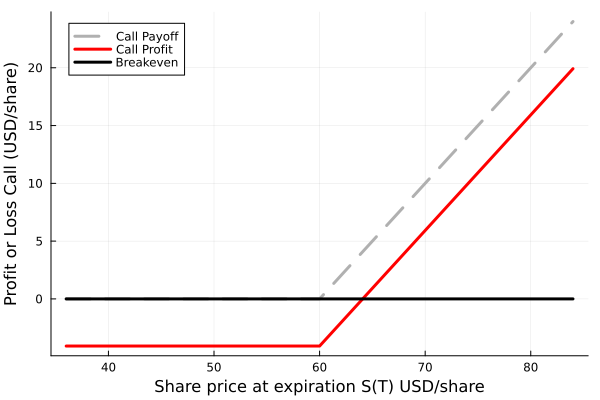

In [7]:
plot(V_call[:,1],  V_call[:,3], label="Call Payoff", lw=3, c=:gray69, ls=:dash)
plot!(V_call[:,1], profit_array_call, label="Call Profit", lw=3, c=:red)
PL = zeros(length(β));
plot!(V_call[:,1], PL, label="Breakeven", lw=3, c=:black)
xlabel!("Share price at expiration S(T) USD/share", fontsize=18)
ylabel!("Profit or Loss Call (USD/share)", fontsize=18)

### Check: Analytical breakeven calculation for a `call` contract
Analysis of the payoff structure for a `call` shows that the breakeven share price $\mathcal{B}_{c}$ is given by the expression (from the buyer's perspective):
$$
\begin{equation}
\mathcal{B}_{c} = K + \mathcal{P}_{c}
\end{equation}
$$
where $K$ denotes the strike price, and $\mathcal{P}_{c}$ denotes the premium paid for the contract. Given the problem parameters, the breakeven for this `call` contract equals $\mathcal{B}_{c}\simeq$`64.08 USD/share`. 

Let's use the [@assert macro](https://docs.julialang.org/en/v1/base/base/#Base.@assert) to check your profit and breakven calculations.

In [13]:
break_even_analytical = 64.08; # USD/share
break_even_numerical = findlast(x -> x ≤ 0, profit_array_call) |> x -> share_price_array[x];
Δ = (break_even_analytical - break_even_numerical)/break_even_analytical;

In [12]:
@assert isapprox(Δ, 0.0, atol=1e-4)

## Objective 2: Compute the Payoff, Profit, and Breakeven for a European `put` contract
We have a European `put` that expires in `T = 365` days with a strike price `K = 60.0 USD`. The current share price is `S(0) = 60.0 USD`. Assume a risk-free rate of return of `5%` and an implied volatility of `10%`. The correct answer is $\mathcal{P}_{p}(K,S(0))\simeq$ `1.16 USD/share`.

Repeat the payoff, profit, and breakeven calculations as a function of the share price at expiration $S(T)$ for this `put` contract.

In [10]:
### Fill me in

### Check: Analytical breakeven calculation
Analysis of the payoff structure for a `put` shows that the breakeven share price $\mathcal{B}_{p}$ is given by the expression (from the buyer's perspective):
$$
\begin{equation}
\mathcal{B}_{p} = K - \mathcal{P}_{p}
\end{equation}
$$
where $K$ denotes the strike price, and $\mathcal{P}_{p}$ denotes the premium paid for the contract. Given the problem parameters, the breakeven for this `put` contract equals $\mathcal{B}_{p}\simeq$`58.84 USD/share`. Use the [@assert macro](https://docs.julialang.org/en/v1/base/base/#Base.@assert) to check your profit calculations.

In [11]:
### fill me in here

## Disclaimer and Risks
__This content is offered solely for training and informational purposes__. No offer or solicitation to buy or sell securities or derivative products or any investment or trading advice or strategy is made, given, or endorsed by the teaching team. 

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance.  Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. Such decisions should be based solely on evaluating your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.